In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Data/FakeNewsData.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X = df.drop('label',axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y = df['label']

In [7]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
df.shape

(18285, 5)

In [13]:
messages = df.copy()

In [14]:
messages.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
messages.reset_index(inplace=True)

In [16]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [17]:
messages['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [18]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [19]:
corpus = []
ps = PorterStemmer()
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [23]:
X = tfidf.fit_transform(corpus).toarray()

In [24]:
X.shape

(18285, 5000)

In [25]:
y = messages['label']

In [26]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [29]:
X_train.shape

(12250, 5000)

In [30]:
X_test.shape

(6035, 5000)

In [31]:
tfidf.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access'], dtype=object)

In [32]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [33]:
count_df = pd.DataFrame(X_train,columns = tfidf.get_feature_names_out())

In [34]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
import matplotlib.pyplot as plt

In [36]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='confusion-matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(i,j, cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### MultinomialNB Algorithm

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
clf = MultinomialNB()

In [41]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import itertools

Accuracy: 0.900
Confusion matrix without normalization


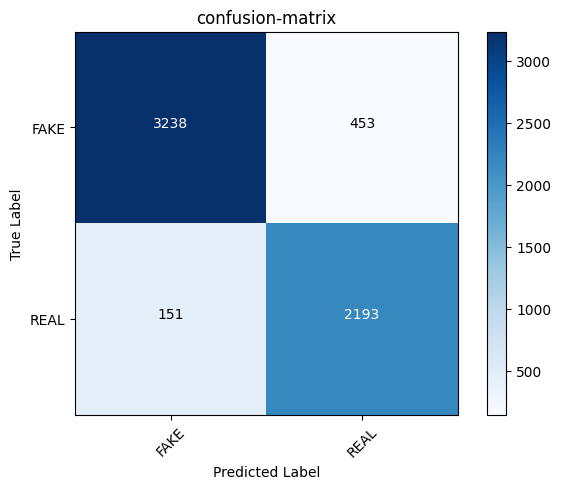

In [42]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy: %0.3f'%score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

### Passive Aggressive Classifier Algorithm

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier

Accuracy: 0.951
Confusion matrix without normalization


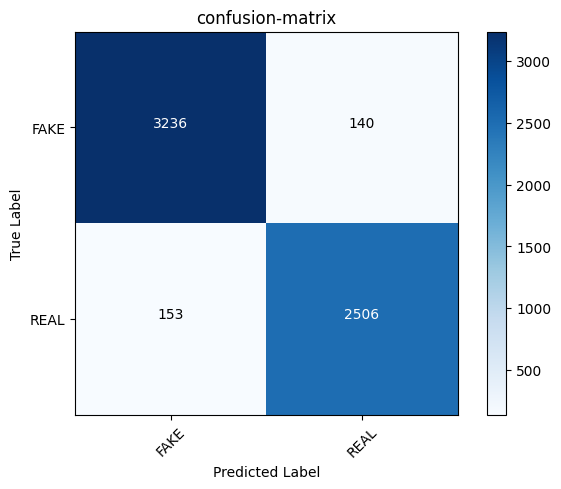

In [48]:
clf = PassiveAggressiveClassifier(max_iter=50,random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy: %0.3f'%score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

### Multinomial Classifier with Hyperparameter

In [49]:
clf = MultinomialNB(alpha=0.1)

In [50]:
clf.get_params()

{'alpha': 0.1, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [53]:
prev_score = 0
for alpha in np.arange(0,1,0.1):
    prev_clf = MultinomialNB(alpha=alpha)
    prev_clf.fit(X_train,y_train)
    y_pred = prev_clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    if score > prev_score:
        clf = prev_clf
    print('Alpha: {}, Accuracy: {}'.format(alpha,score))

C:\Users\Ciya\anaconda3\envs\llm_test\lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\Ciya\anaconda3\envs\llm_test\lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Accuracy: 0.5615575807787904
Alpha: 0.1, Accuracy: 0.9017398508699255
Alpha: 0.2, Accuracy: 0.9020712510356255
Alpha: 0.30000000000000004, Accuracy: 0.9022369511184756
Alpha: 0.4, Accuracy: 0.9020712510356255
Alpha: 0.5, Accuracy: 0.9014084507042254
Alpha: 0.6000000000000001, Accuracy: 0.9015741507870754
Alpha: 0.7000000000000001, Accuracy: 0.9012427506213753
Alpha: 0.8, Accuracy: 0.9009113504556753
Alpha: 0.9, Accuracy: 0.9005799502899752


In [54]:
# Get Feature Names
feature_names = tfidf.get_feature_names_out()

In [55]:
len(feature_names)

5000

In [56]:
clf.feature_log_prob_

array([[ -9.12693158,  -8.85404287,  -8.37578731, ..., -10.02440559,
         -8.72415806, -11.33915105],
       [ -9.52147382,  -8.98567005,  -8.75019038, ...,  -9.00768675,
         -8.29304531,  -8.47560634]])

In [57]:
len(clf.feature_log_prob_)

2

In [58]:
len(clf.feature_log_prob_[0])

5000

In [59]:
# Most Fake Words
sorted(zip(clf.feature_log_prob_[0], feature_names))

[(-11.384569945135524, 'auf'),
 (-11.384569945135524, 'en el'),
 (-11.384569945135524, 'fli zone'),
 (-11.384569945135524, 'html'),
 (-11.384569945135524, 'http co'),
 (-11.384569945135524, 'http www'),
 (-11.384569945135524, 'infowar life'),
 (-11.384569945135524, 'pic twitter com'),
 (-11.384569945135524, 'ufo'),
 (-11.384569945135524, 'utm'),
 (-11.363715819078537, 'brain forc'),
 (-11.362130833778155, 'twitter com'),
 (-11.348963751279618, 'oligarchi'),
 (-11.348833232513876, 'infowar com'),
 (-11.33915104590614, 'zu'),
 (-11.329820752669196, 'ein'),
 (-11.327340283772534, 'ist'),
 (-11.307187908874361, 'como'),
 (-11.306995492990557, 'kadzik'),
 (-11.295088488931421, 'una'),
 (-11.27210864843248, 'share articl'),
 (-11.264828467519804, 'creamer'),
 (-11.260483259467819, 'und'),
 (-11.252324826009453, 'widget'),
 (-11.250311644579911, 'rule class'),
 (-11.245355318005322, 'por'),
 (-11.18124342388225, 'neocon'),
 (-11.160672709277707, 'www'),
 (-11.15931299379276, 'neo'),
 (-11.154

In [60]:
# Most Real Words
sorted(zip(clf.feature_log_prob_[0],feature_names),reverse=True)

[(-4.880660413777711, 'mr'),
 (-5.139321704939018, 'said'),
 (-5.417450800223778, 'trump'),
 (-5.945904009383865, 'mr trump'),
 (-6.010439748361563, 'presid'),
 (-6.0597181356282315, 'state'),
 (-6.176438578227852, 'ms'),
 (-6.186978921465968, 'would'),
 (-6.190664081844223, 'one'),
 (-6.203719010990081, 'peopl'),
 (-6.213971635691953, 'new'),
 (-6.216849578098212, 'year'),
 (-6.316771363165209, 'time'),
 (-6.330066788761383, 'like'),
 (-6.405502286042061, 'report'),
 (-6.469793020402705, 'also'),
 (-6.506211037844364, 'say'),
 (-6.528582134080173, 'news'),
 (-6.532878319242008, 'american'),
 (-6.539461379556004, 'polic'),
 (-6.556792058146907, 'hous'),
 (-6.564829068281895, 'go'),
 (-6.5694978952269185, 'nation'),
 (-6.579859624549368, 'unit'),
 (-6.582300883839197, 'twitter'),
 (-6.604033449564102, 'work'),
 (-6.606771196002003, 'countri'),
 (-6.634408291576989, 'last'),
 (-6.639125767986924, 'offic'),
 (-6.647197025333004, 'govern'),
 (-6.656519018587375, 'republican'),
 (-6.6618432

In [61]:
# Most Fake Words
sorted(zip(clf.feature_log_prob_[1],feature_names))

[(-10.991740188222842, 'brief post'),
 (-10.991740188222842, 'follow pam'),
 (-10.991740188222842, 'follow pam key'),
 (-10.991740188222842, 'gold medal'),
 (-10.991740188222842, 'gorsuch'),
 (-10.991740188222842, 'judg gorsuch'),
 (-10.991740188222842, 'key twitter'),
 (-10.991740188222842, 'key twitter pamkeynen'),
 (-10.991740188222842, 'morn brief'),
 (-10.991740188222842, 'mr ail'),
 (-10.991740188222842, 'mr bannon'),
 (-10.991740188222842, 'mr castro'),
 (-10.991740188222842, 'mr christi'),
 (-10.991740188222842, 'mr cruz'),
 (-10.991740188222842, 'mr de'),
 (-10.991740188222842, 'mr flynn'),
 (-10.991740188222842, 'mr kushner'),
 (-10.991740188222842, 'mr roof'),
 (-10.991740188222842, 'mr sander'),
 (-10.991740188222842, 'mr scott'),
 (-10.991740188222842, 'mr session'),
 (-10.991740188222842, 'mr spicer'),
 (-10.991740188222842, 'mr xi'),
 (-10.991740188222842, 'ms trump'),
 (-10.991740188222842, 'pam key'),
 (-10.991740188222842, 'pam key twitter'),
 (-10.991740188222842, 'p

In [63]:
# Most Real Words
sorted(zip(clf.feature_log_prob_[1],feature_names),reverse=True)

[(-5.400573176146374, 'clinton'),
 (-5.504449523154856, 'trump'),
 (-5.689699395630466, 'hillari'),
 (-5.927658316663332, 'us'),
 (-5.943924155634382, 'elect'),
 (-6.141141898356725, 'peopl'),
 (-6.153679149791046, 'vote'),
 (-6.1855372689534684, 'state'),
 (-6.209385038898738, 'email'),
 (-6.231070569259119, 'one'),
 (-6.304754452471091, 'hillari clinton'),
 (-6.30763946084777, 'fbi'),
 (-6.325864550609382, 'would'),
 (-6.334934576217139, 'like'),
 (-6.373788650596871, 'american'),
 (-6.392869520601681, 'time'),
 (-6.398029580588211, 'war'),
 (-6.415258514684246, 'world'),
 (-6.450564452209334, 'year'),
 (-6.459455119306126, 'octob'),
 (-6.461509006925341, 'use'),
 (-6.4786808937800835, 'presid'),
 (-6.483913997386739, 'said'),
 (-6.4864343084136005, 'new'),
 (-6.513085105096063, 'go'),
 (-6.5359473448237155, 'right'),
 (-6.544316517012502, 'govern'),
 (-6.55467626299446, 'obama'),
 (-6.557565643212362, 'russia'),
 (-6.560687723846378, 'post'),
 (-6.56182992242878, 'campaign'),
 (-6.5

#### Hashing Vectorizer

In [68]:
hv = HashingVectorizer(n_features=5000,alternate_sign=False)
X = hv.fit_transform(corpus).toarray()

In [67]:
hv.get_params()

{'alternate_sign': True,
 'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'n_features': 5000,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None}

In [69]:
X.shape

(18285, 5000)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [71]:
from sklearn.naive_bayes import MultinomialNB

Accuracy: 0.876
Confusion matrix without normalization


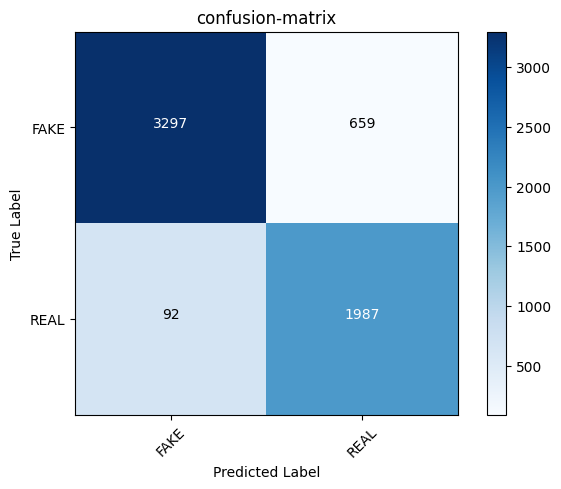

In [73]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy: %0.3f'%score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])